## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
from __future__ import print_function
import math

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Let's explore the dataset a little bit

In [5]:
# Loading data in Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train[0].shape

(28, 28)

In [20]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [24]:
# What is the corresponding label in the training set?
y_train[333]

8

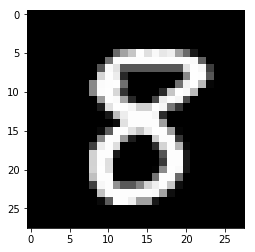

In [26]:
# Displaying an image.
plt.imshow(x_train[333], cmap='Greys_r')

In [27]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [34]:
x_train.shape

(60000, 28, 28)

In [36]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# Keras works with only floating points
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train /= 255
x_test /= 255

In [39]:
type(y_train)

numpy.ndarray

In [40]:
# Generate a binary matrix for the labels
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [42]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize

model_1 = Sequential()
model_1.add(Dense(64, input_shape=(784,), activation='relu')) # First Layer
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu')) # Second layer
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [43]:
## Note that this model has a LOT of parameters
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Let's compile the model
learning_rate = 0.001
model_1.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(lr=learning_rate),
               metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [49]:
batch_size = 128
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    epochs=epochs,
    verbose=1
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 62us/step - loss: 1.6874 - acc: 0.4762 - val_loss: 0.9804 - val_acc: 0.7092
Epoch 2/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.8995 - acc: 0.6982 - val_loss: 0.6675 - val_acc: 0.8003
Epoch 3/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.6912 - acc: 0.7790 - val_loss: 0.5197 - val_acc: 0.8488
Epoch 4/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.5603 - acc: 0.8297 - val_loss: 0.4202 - val_acc: 0.8766
Epoch 5/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.4775 - acc: 0.8568 - val_loss: 0.3635 - val_acc: 0.8940
Epoch 6/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.4294 - acc: 0.8724 - val_loss: 0.3318 - val_acc: 0.9038
Epoch 7/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.3904 - acc: 0.8831 - val_loss: 0.3020 - val_acc

In [50]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1460891460020095
Test accuracy: 0.957


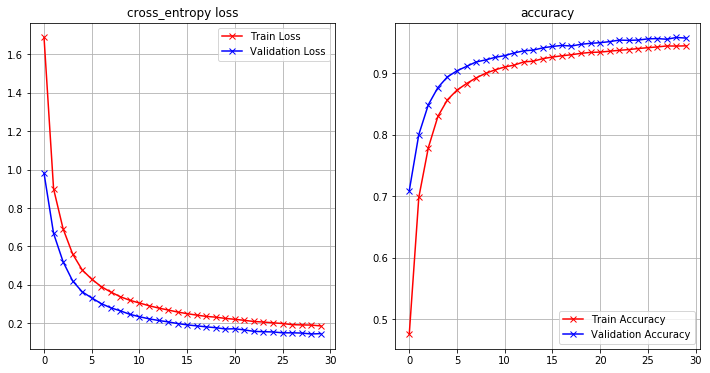

In [51]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [ ]:
### Build your model here
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [95]:
## My model
model_2 = Sequential([
    Dense(400, input_shape=(784,), activation='relu'),
    Dropout(0.4),
    Dense(300, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

In [96]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_15 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 300)               120300    
_________________________________________________________________
dropout_16 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


## SOLUTION

In [97]:
model_2.compile(
    optimizer  = RMSprop(lr=0.001),
    loss       = 'categorical_crossentropy',
    metrics    = ['accuracy'],
    
)

In [100]:
batch_size = 128
epochs     = 20
history_2  = model_2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size = batch_size,
    verbose=1,
    epochs=epochs
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0795 - acc: 0.9775 - val_loss: 0.0858 - val_acc: 0.9790
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0764 - acc: 0.9784 - val_loss: 0.0936 - val_acc: 0.9771
Epoch 3/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0782 - acc: 0.9789 - val_loss: 0.0884 - val_acc: 0.9789
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0751 - acc: 0.9786 - val_loss: 0.0863 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0748 - acc: 0.9790 - val_loss: 0.0844 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0740 - acc: 0.9794 - val_loss: 0.0916 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0744 - acc: 0.9797 - val_loss: 0.0917 - 

In [101]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score_2[0])
print('Accuracy:  ', score_2[1])

Test Loss:  0.09094608470138774
Accuracy:   0.9797


## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?